<a href="https://colab.research.google.com/github/anshupandey/Working_with_Large_Language_models/blob/main/WWL_UC_Retail_Restaurant_creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create High Quality Visual Assets with Imagen and Gemini




## Overview

[Imagen on Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/image/overview) lets developers quickly generate high-quality images from simple text descriptions. Build and edit innovative AI-powered imagery with ease.

### Objectives

In this notebook, you will create high quality visual assets for a restaurant menu using Imagen and Gemini. You will:

- Generate an image prompt with Gemini Pro
- Use Imagen to create high quality images using prompts
- Implement a short pipeline to produce highly-detailed visual assets

### Costs

- This notebook uses billable components of Google Cloud:
  - Vertex AI

- Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing) and use the [Pricing Calculator](https://cloud.google.com/products/calculator/) to generate a cost estimate based on your projected usage.

## Getting Started

### Install Vertex AI SDK for Python

In [1]:
! pip install --quiet --upgrade --user google-cloud-aiplatform

### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the kernel.

In [2]:
# Restart kernel after installs so that your environment can access the new packages
import IPython
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel will restart. Please wait until it completes before continuing to the next step. ⚠️</b>
</div>

### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment. This step is not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).

In [3]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

### Define Google Cloud project information and initialize Vertex AI

Initialize the Vertex AI SDK for Python for your project:

In [1]:
# Define project information
PROJECT_ID = "jrproject-402905"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# Initialize Vertex AI
import vertexai
vertexai.init(project=PROJECT_ID, location=LOCATION)

## Image Generation

### Load the image generation model

The model names from Vertex AI Imagen have two components:
* Model name
* Version number

For example, `imagegeneration@005` represent the **005** version of **imagegeneration** model.

`imagegeneration@005` is also known as [Imagen 2](https://cloud.google.com/blog/products/ai-machine-learning/imagen-2-on-vertex-ai-is-now-generally-available).



In [2]:
from vertexai.preview.vision_models import ImageGenerationModel

imagen_model = ImageGenerationModel.from_pretrained("imagegeneration@005")

### Generate your first image

The `generate_image` function is used to generate images.

All you need to input is a simple text prompt.

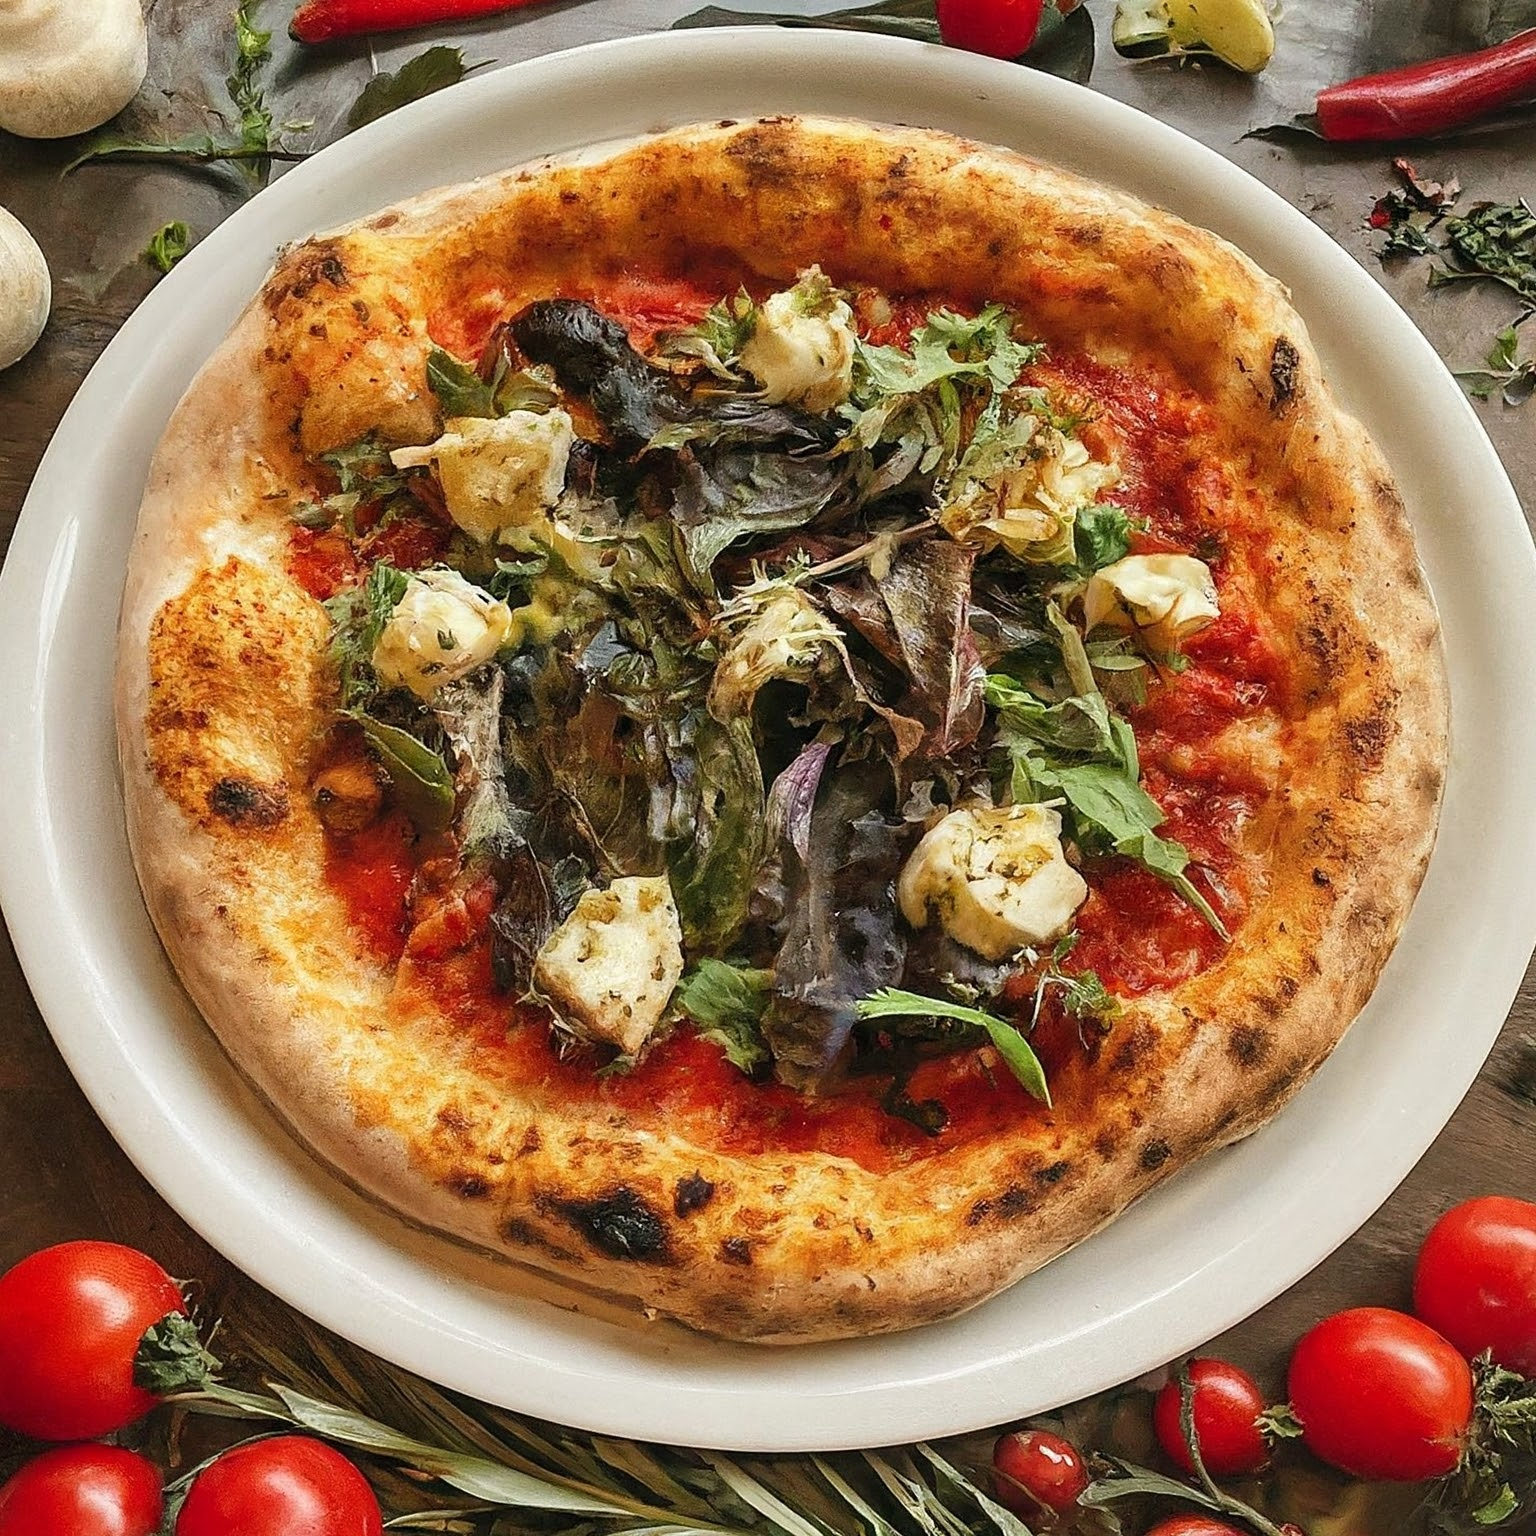

In [3]:
image_prompt = "A delicious pizza"

response = imagen_model.generate_images(
    prompt=image_prompt,
)

response.images[0].show()

### Generating more than one image

You can currently generate up to **4** images at a time with Imagen. Imagen provides several variations based on your prompt.

You will do that in the cell below. An axuillary function to display images in grid is also provided.

In [4]:
import math
import matplotlib.pyplot as plt


# An auxiliary function to display images in grid
def display_images_in_grid(images):
    nrows = math.ceil(len(images) / 4)  # Display at most 4 images per row
    ncols = min(len(images) + 1, 4)  # Adjust columns based on the number of images

    # Create a figure and axes for the grid layout.
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i]._pil_image)
            ax.set_aspect("equal")
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis("off")

    plt.tight_layout()
    plt.show()

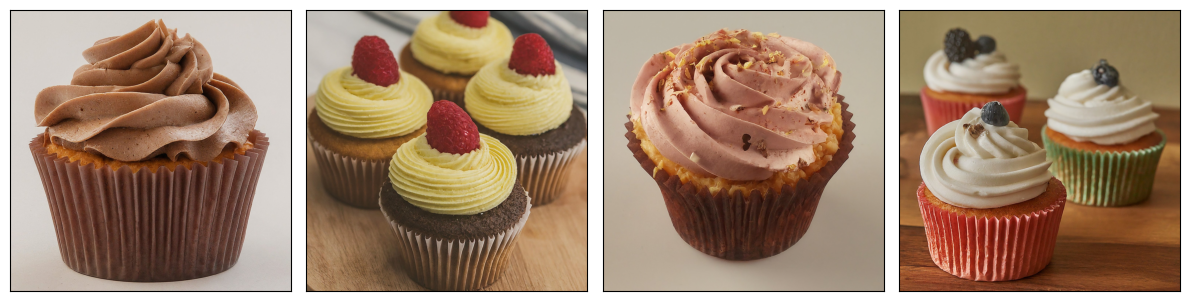

In [5]:
image_prompt = "delicious cupcakes"

response = imagen_model.generate_images(
    prompt=image_prompt,
    number_of_images=4,
)

display_images_in_grid(response.images)

### Load the Gemini Pro model

To load the Gemini Pro model, provide **gemini-pro** as an argument to **GenerativeModel** constructor.

In [6]:
from vertexai.preview.generative_models import GenerativeModel

gemini_pro_model = GenerativeModel("gemini-pro")

### Use Gemini to generate text content

The `generate_content` function can be used to generate content with Gemini Pro model. You just need to provide a simple textual prompt.

In [7]:
# Provide text prompt and invoke generate_content
text_prompt = "What are the steps to open a restaurant?"

responses = gemini_pro_model.generate_content(
    contents=text_prompt,
    stream=True,
)

for res in responses:
    print(res.text)

##
 Opening a restaurant is a complex process, but with careful planning and execution, it can
 be a rewarding endeavor. Here's a breakdown of the key steps involved:

**
1. Develop a Business Plan:** 

* **Concept**: Clearly define your restaurant concept, including cuisine, target audience, atmosphere, and price point.
* **Market
 research**: Analyze your competition, potential customers, and the overall restaurant landscape in your area.
* **Financial plan**: Create a detailed financial plan outlining your start-up costs
, operating expenses, revenue projections, and potential profit margins.

**2. Choose a Location:** 

* **Accessibility**: Consider factors like proximity to your target market, parking availability, and public transportation access.
* **Visibility**:
 Opt for a location that's easily visible from the street with good foot traffic.
* **Regulations**: Ensure the location complies with all zoning, building, and health codes.

**3. Secure Funding:** 

* **Personal
 sav

To improve the user experience and reproducibility, you will define a generation config and create a function to boostrap content generation with Gemini Pro.

In [8]:
from IPython.display import display, Markdown, Latex

from vertexai.preview.generative_models import GenerationConfig


# Provide text prompt and invoke generate_content
def generate_content(prompt):
    # Define generation config to improve reproducibility
    generation_config = GenerationConfig(
        temperature=0.5,
        top_p=0.8,
        top_k=10,
        candidate_count=1,
        max_output_tokens=1024,
    )

    responses = gemini_pro_model.generate_content(
        contents=text_prompt,
        generation_config=generation_config,
        stream=True,
    )

    output = ""
    for res in responses:
        output += res.text.strip()

    return output

In [9]:
text_prompt = "What are the steps to open a restaurant?"
response = generate_content(text_prompt)

display(Markdown(response))

##Opening a Restaurant: A Step-by-Step Guide

Opening a restaurant isan exciting and challenging endeavor. It requires careful planning, execution, and a passion for food andhospitality. Here's a comprehensive guide to help you navigate the process:

**1. Develop a Concept and Business Plan:**

* **Concept:** Define your restaurant's unique selling proposition (USP). What type of cuisine will you offer? What will be your target audience? What will set you apart from the competition?
* **BusinessPlan:** This document outlines your restaurant's goals, strategies, and financial projections. It should include market research, menu development, operational plans, marketing strategies, and financial forecasts.

**2. Secure Funding:**

* Determine the totalcapital required for startup costs, equipment, inventory, and operating expenses.
* Explore funding options such as personal savings, loans, grants, and investors.

**3. Choose a Location:**

* Consider factors like demographics, competition, accessibility,visibility, and rent.
* Research zoning regulations and permits required for operating a restaurant in your chosen location.

**4. Obtain Licenses and Permits:**

* Contact your local government to determine the necessary licenses and permits for operating a restaurant. This may include business licenses, food service permits, health permits, liquor licenses, andsignage permits.

**5. Design and Build Your Restaurant:**

* Create a layout that optimizes space and workflow for both the kitchen and dining area.
* Choose furniture, fixtures, and equipment that align with your concept and budget.
* Ensure compliance with building codes and accessibility standards.

**6.Develop a Menu:**

* Design a menu that reflects your concept, target audience, and budget.
* Consider factors like seasonality, sourcing, pricing, and dietary restrictions.
* Test and refine your menu before launch.

**7. Hire and Train Staff:**

* Recruit qualified staff for front-of-house and back-of-house positions.
* Provide thorough training on food preparation, service standards, and safety protocols.

**8. Market and Promote Your Restaurant:**

* Develop a marketing strategy that reaches your target audience through various channels, such as social media, online listings, public relations, and community events.
*Offer promotions and incentives to attract customers during your opening phase.

**9. Monitor and Adjust:**

* Regularly track your restaurant's performance, analyze customer feedback, and make adjustments to your menu, operations, and marketing strategies as needed.

**Additional Resources:**

* National Restaurant Association: https://restaurant.org/* Small Business Administration: https://www.sba.gov/
* SCORE: https://www.score.org/

**Remember:**

* Opening a restaurant is a complex process that requires careful planning and execution.
* Be prepared to face challenges and adapt to changing circumstances.
* With dedication,passion, and a well-defined plan, you can increase your chances of success in this competitive industry.

### Generate a restaurant menu with Gemini Pro



In [10]:
text_prompt = (
    "Provide a menu for an Italian restaurant. Give each menu item a brief description."
)
response = generate_content(text_prompt)

display(Markdown(response))

##Benvenuti a La Piazza!

We invite you to experience the authentic flavors ofItaly in the heart of your city. Our menu features fresh, seasonal ingredients and traditionalrecipes passed down through generations. 

### Antipasti (Starters)

* **Bruschetta al Pomodoro:** Toasted bread topped with fresh tomatoes,garlic, basil, and olive oil. **($8)**
* **Focaccia al Rosmarino:** Warm rosemary focaccia bread served with olive oil andbalsamic vinegar. **($6)**
* **Carpaccio di Manzo:** Thinly sliced beef tenderloin with shaved Parmesan cheese, arugula, and a lemon vinaigrette. **($16)**
* **Arancini di Riso:** Crispy fried rice balls filled with meat ragu or spinach and cheese. **($12)**
* **Calamari Fritti:** Lightly fried calamari with a spicy marinara dipping sauce. **($14)**

### Primi Piatti(First Courses)

* **Insalata Caprese:** Fresh mozzarella, tomatoes, and basil drizzled with olive oil and balsamic vinegar. **($12)**
* **Pasta e Fagioli:** Hearty soup with pasta, beans, vegetables, and Italian sausage. **($10)**
* **Spaghettialla Carbonara:** Classic pasta dish with pancetta, eggs, Parmesan cheese, and black pepper. **($15)**
* **Penne Arrabbiata:** Spicy penne pasta with tomato sauce, garlic, and chili flakes. **($14)**
* **Risotto ai Funghi:** Creamy risotto withporcini mushrooms, white wine, and Parmesan cheese. **($18)**

### Secondi Piatti (Main Courses)

* **Saltimbocca alla Romana:** Veal scaloppini topped with prosciutto, sage, and white wine sauce. **($24)**
* **Pollo al Mattone:**Roasted chicken cooked under a brick for a crispy skin and juicy interior. **($20)**
* **Salmone al Limone:** Pan-seared salmon with a lemon-butter sauce and roasted vegetables. **($22)**
* **Bistecca Fiorentina:** Grilled T-bone steak served with rosemarypotatoes and grilled vegetables. **($35)**
* **Pizza Margherita:** Classic pizza with tomato sauce, mozzarella cheese, and fresh basil. **($14)**
* **Pizza Diavola:** Spicy pizza with tomato sauce, mozzarella cheese, salami, and chili flakes. **($16)**

### Contorni(Side Dishes)

* **Patate al Forno:** Roasted potatoes with rosemary and garlic. **($5)**
* **Verdure Grigliate:** Grilled seasonal vegetables. **($6)**
* **Insalata Mista:** Mixed green salad with balsamic vinaigrette. **($4)**

### Dolci (Desserts)

* **Tiramisu:** Classic Italian dessert with ladyfingers, espresso, mascarpone cheese, and cocoa powder. **($8)**
* **Panna Cotta:** Creamy custard dessert topped with fresh berries. **($7)**
* **Gelato:** Selection of homemade Italian ice cream. **($5)*** **Cannoli:** Crispy pastry shells filled with ricotta cheese and candied fruit. **($6)**

We hope you enjoy your dining experience at La Piazza. Please let us know if you have any questions or dietary restrictions.

**Buon appetito!**

### Improve an existing image prompt Gemini Pro

Here you'll use the image prompt technique of including a **style**, a **subject**, and a **context / background**.

PROMPT: 
  Rewrite "A delicious pizza" into an image prompt.
  For example: A sketch of a modern apartment building surrounded by skyscrapers.
  "A sketch" is a style.
  "A modern apartment building" is a subject.
  "Surrounded by skyscrapers" is a context and background.

  Here are a few "styles" to get inspiration from:
  - A studio photo
  - A professional photo

  Here are a few "context and background" to inspiration from:
  - In a kitchen on a wooden surface with natural lighting
  - On a marble counter top with studio lighting
  - In an Italian restaurant

  Rewritten prompt:

RESPONSE: 
  ##Rewritten Prompt:

**Style:** A professional photo

**Subject:** Adelicious pizza

**Context and Background:** On a marble countertop with studio lighting.The pizza should be the main focus, with a shallow depth of field to blur the background slightly. 

**Additional Details:** 

* The pizza shouldbe freshly baked, with a golden crust and melted cheese. 
*  A variety of toppings should be 

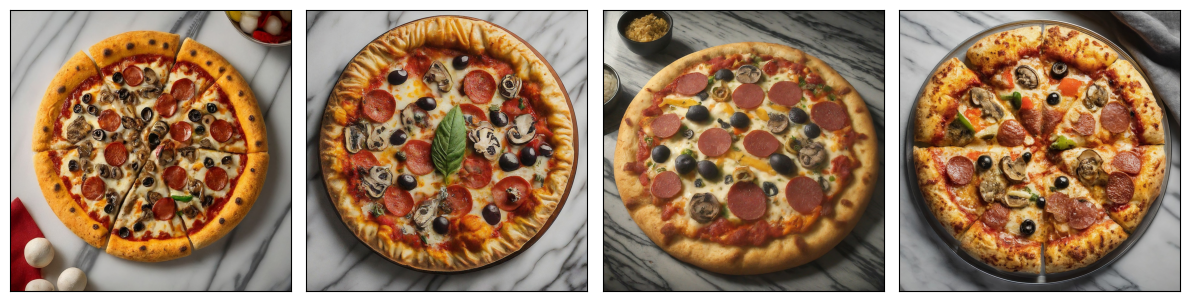

In [11]:
image_prompt = "A delicious pizza"

prompt_template = """
  Rewrite "{image_prompt}" into an image prompt.
  For example: A sketch of a modern apartment building surrounded by skyscrapers.
  "A sketch" is a style.
  "A modern apartment building" is a subject.
  "Surrounded by skyscrapers" is a context and background.

  Here are a few "styles" to get inspiration from:
  - A studio photo
  - A professional photo

  Here are a few "context and background" to inspiration from:
  - In a kitchen on a wooden surface with natural lighting
  - On a marble counter top with studio lighting
  - In an Italian restaurant

  Rewritten prompt:
"""

text_prompt = prompt_template.format(image_prompt=image_prompt)
rewritten_image_prompt = generate_content(text_prompt)

print(f"PROMPT: {text_prompt}")
print(f"RESPONSE: \n  {rewritten_image_prompt}")

response = imagen_model.generate_images(
    prompt=rewritten_image_prompt,
    number_of_images=4,
)

display_images_in_grid(response.images)

## Visual asset pipeline

Now that you have seen Gemini Pro's capabilities to create a complete restaurant menu and how it can enhance the quality of image prompts, the next step is to establish a formal asset pipeline that leverages these abilities.

### Standardize the output as JSON format

In the previous attempts, Gemini Pro returned either in Markdown or plaintext responses, which made it difficult to integrate with further steps.

To solve this, we'll ask that Gemini standardize the response in JSON format. This will make the response easier to process and integrate downstream.

In [12]:
text_prompt = """
  Provide a menu for an Italian restaurant in a JSON fomat.
  Each item in the menu should have a name and a description.
  The item description should contain the ingredients and how the item was prepared.
  Don't include "of the day" items such as "soup of the day".

  The parent fields should be starters, main courses, desserts, and drinks.
  Parent fields should be lower cased.
  The child fields should be name and description.
  Do not include JSON decorator.
  """
response = generate_content(text_prompt)
print(response)

```json
{
  "starters": [
    {
      "name":"Bruschetta",
      "description": "Grilled bread topped with diced tomatoes,garlic, basil, and olive oil."
    },
    {
      "name": "Caprese Salad",
      "description": "Fresh mozzarella, tomatoes, and basil drizzled with olive oil and balsamic vinegar."
    },
    {
      "name": "Arancini",
      "description":"Fried balls of risotto rice filled with meat, cheese, or vegetables."
    }
  ],
  "main courses": [
    {
      "name": "Lasagna",
      "description": "Layers of pasta, meat sauce, and cheese baked in the oven."
    },
    {
      "name": "Spaghetti Carbonara",
      "description": "Spaghetti pasta tossed with eggs, pancetta, and Parmesan cheese."},
    {
      "name": "Pizza Margherita",
      "description": "Pizza topped with tomato sauce, mozzarella cheese, and basil."
    }
  ],
  "desserts": [
    {
      "name": "Tiramisu",
      "description": "Layers ofcoffee-soaked ladyfingers, mascarpone cheese, and cocoa powder."
  

In [14]:
response

'```json\n{\n  "starters": [\n    {\n      "name":"Bruschetta",\n      "description": "Grilled bread topped with diced tomatoes,garlic, basil, and olive oil."\n    },\n    {\n      "name": "Caprese Salad",\n      "description": "Fresh mozzarella, tomatoes, and basil drizzled with olive oil and balsamic vinegar."\n    },\n    {\n      "name": "Arancini",\n      "description":"Fried balls of risotto rice filled with meat, cheese, or vegetables."\n    }\n  ],\n  "main courses": [\n    {\n      "name": "Lasagna",\n      "description": "Layers of pasta, meat sauce, and cheese baked in the oven."\n    },\n    {\n      "name": "Spaghetti Carbonara",\n      "description": "Spaghetti pasta tossed with eggs, pancetta, and Parmesan cheese."},\n    {\n      "name": "Pizza Margherita",\n      "description": "Pizza topped with tomato sauce, mozzarella cheese, and basil."\n    }\n  ],\n  "desserts": [\n    {\n      "name": "Tiramisu",\n      "description": "Layers ofcoffee-soaked ladyfingers, mascarp

In [17]:
import json
response = response.replace("```json", "").replace("```", "")
# Load the responses into a JSON format
jsonized_response = json.loads(response)
jsonized_response["starters"]

[{'name': 'Bruschetta',
  'description': 'Grilled bread topped with diced tomatoes,garlic, basil, and olive oil.'},
 {'name': 'Caprese Salad',
  'description': 'Fresh mozzarella, tomatoes, and basil drizzled with olive oil and balsamic vinegar.'},
 {'name': 'Arancini',
  'description': 'Fried balls of risotto rice filled with meat, cheese, or vegetables.'}]

### Generating visual asset programmatically

Using the jsonized menu, you will be creating a batch of images programatically using Imagen. You will use Gemini Pro model to rewrite each description into a detailed image prompt.

In [18]:
# convert a description into an image prompt
description = jsonized_response["starters"][0]["description"]
text_prompt = prompt_template.format(image_prompt=description)
image_prompt = generate_content(text_prompt)

print(f"DESCRIPTION:\n  {description}\n")
print(f"IMAGE PROMPT:\n  {image_prompt}\n")

DESCRIPTION:
  Grilled bread topped with diced tomatoes,garlic, basil, and olive oil.

IMAGE PROMPT:
  ##Rewritten Image Prompt:

**Style:** A professional photo

**Subject:** Aslice of grilled bread, generously topped with diced tomatoes, garlic, and fresh basilleaves.

**Context and Background:** The bread rests on a rustic wooden cutting board, bathed in warm natural light streaming through a window. In the background,a glimpse of a vibrant Italian kitchen with copper pots hanging from the ceiling and fresh herbs growing in terracotta pots.



Here you will generate **starters** from the menu

ORIGINAL: Grilled bread topped with diced tomatoes,garlic, basil, and olive oil.
IMPROVED: Astudio photo of grilled bread topped with diced tomatoes, garlic, basil, and olive oil. The bread is on a white plate with a black background. The tomatoes are red andjuicy, the garlic is white and pungent, the basil is green and fragrant, and the olive oil is golden and glistening. The photo is well-lit andthe colors are vibrant.


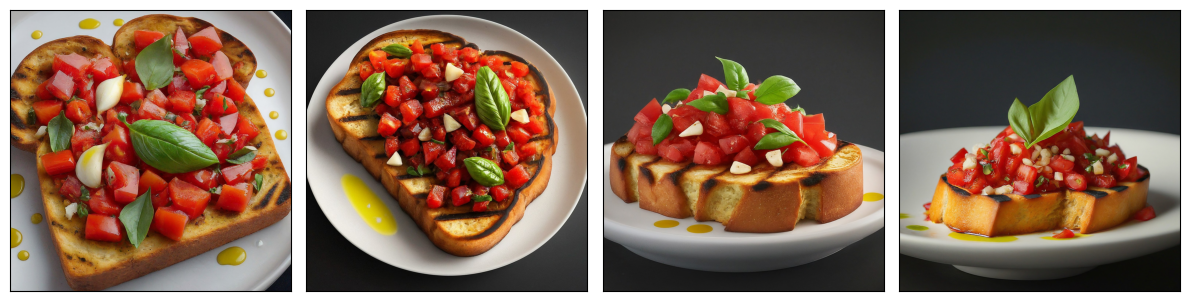


ORIGINAL: Fresh mozzarella, tomatoes, and basil drizzled with olive oil and balsamic vinegar.
IMPROVED: ##A professional photo of fresh mozzarella, tomatoes, and basil drizzled with olive oiland balsamic vinegar.

**Details:**

* **Style:** A professional photowith a clean and elegant aesthetic.
* **Subject:** Fresh mozzarella, tomatoes, and basil.
* **Composition:** The mozzarella, tomatoes, and basil are arrangedon a white plate, with the mozzarella in the center and the tomatoes and basil surrounding it. The plate is placed on a dark wooden table.
* **Lighting:** Natural light from a window is illuminating the scene, creating a soft and inviting atmosphere.
* **Focus:** The mozzarella, tomatoes, and basil are in sharp focus, while the background is slightly blurred.
* **Details:** The oliveoil and balsamic vinegar are drizzled over the mozzarella, tomatoes, and basil, adding a touch of shine and flavor. The basil leaves are fresh and vibrant green, and the tomatoes are ripe and jui

InvalidArgument: 400 Image generation failed with the following error: The response is blocked, as it may violate our policies. If you believe this is an error, please send feedback to your account team. Error Code: 42876398

In [19]:
for starter in jsonized_response["starters"]:
    text_prompt = prompt_template.format(image_prompt=starter["description"])
    image_prompt = generate_content(text_prompt)

    print(f"ORIGINAL: {starter['description']}")
    print(f"IMPROVED: {image_prompt}")

    response = imagen_model.generate_images(
        prompt=image_prompt,
        number_of_images=4,
    )

    display_images_in_grid(response.images)
    print()

## Conclusion

Congratulations! You have successfully created a professional restaurant menu with the help of Gemini and Imagen!

Imagen on Vertex AI can do much more that generating realistic images. Imagen allows you to edit images, generate captions, ask questions of images, and more. Explore all the features of Imagen [here](https://cloud.google.com/vertex-ai/docs/generative-ai/image/overview).

You may also explore the Imagen [prompting guide](https://cloud.google.com/vertex-ai/docs/generative-ai/image/img-gen-prompt-guide?_ga=2.128324367.-2094800479.1701746552&_gac=1.219926379.1701161688.CjwKCAiAvJarBhA1EiwAGgZl0LFQUFOFZUxfNPlzjB4T00PDiLeCIEYfY-coLbX9eUfHKr_i8VbtSBoCEJQQAvD_BwE) to enhance your prompting skills. Please note that you need to be allowlisted to see the full guide.